# Разведочный анализ

Разведочный анализ может проводится как до преобразования количественных данных, так и после преобразования, в зависимости от задач исследования, при этом его результаты могут существенно отличаться в этих двух случаях (до преобразования и после).

Разведочный анализ можно разделить на 2 части: визуализация данных, расчет описательных статистик. Часто также определяют связь между переменными, строя матрицу парных коэффициентов корреляции и факторные отбирая переменные, наиболее тесно связанные с результативной.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('/content/agaricus-lepiota3.csv', sep = ';', header = 0)

In [97]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
1,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
2,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
3,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
4,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3


Визуализация данных

Визуализация данных подразумевает построение различных графиков:

   - График временного ряда (Time series graph) – стандартный график, на котором обычно по оси OY откладывают значения переменной, по оси OX – моменты времени.
   - Гистограмма (Histogram) – график, основанный на таблице из 2 столбцов. Первый столбец – интервалы (class intervals, bins) значений переменной, делящие объекты на группы. Второй столбец – частоты (frequency), показывающие, сколько объектов входит в каждый интервал. По оси OY откладывают частоты, по оси OX – интервалы.
   - Диаграмма рассеяния (точечная диаграмма) (XY-plot, Scatter diagram) – график, показывающий связь, отношение между двумя переменными – X и Y. Обычно Y – зависимая переменная, X – независимая, факторная переменная, влияющая на Y. По оси OY откладывают значения переменной Y, по оси OX – значения переменной X.

Построить диаграммы рассеяния между каждой парой переменных в наборе данных df и гистограммы по каждой переменной позволяет библиотека seaborn и функция pairplot():

In [99]:
sns.pairplot(df)

Мы можем выбрать несколько факторных переменных и получить более читаемый график. Например, выберем столбцы 14, 15, 16, помимо столбца с метками классов:

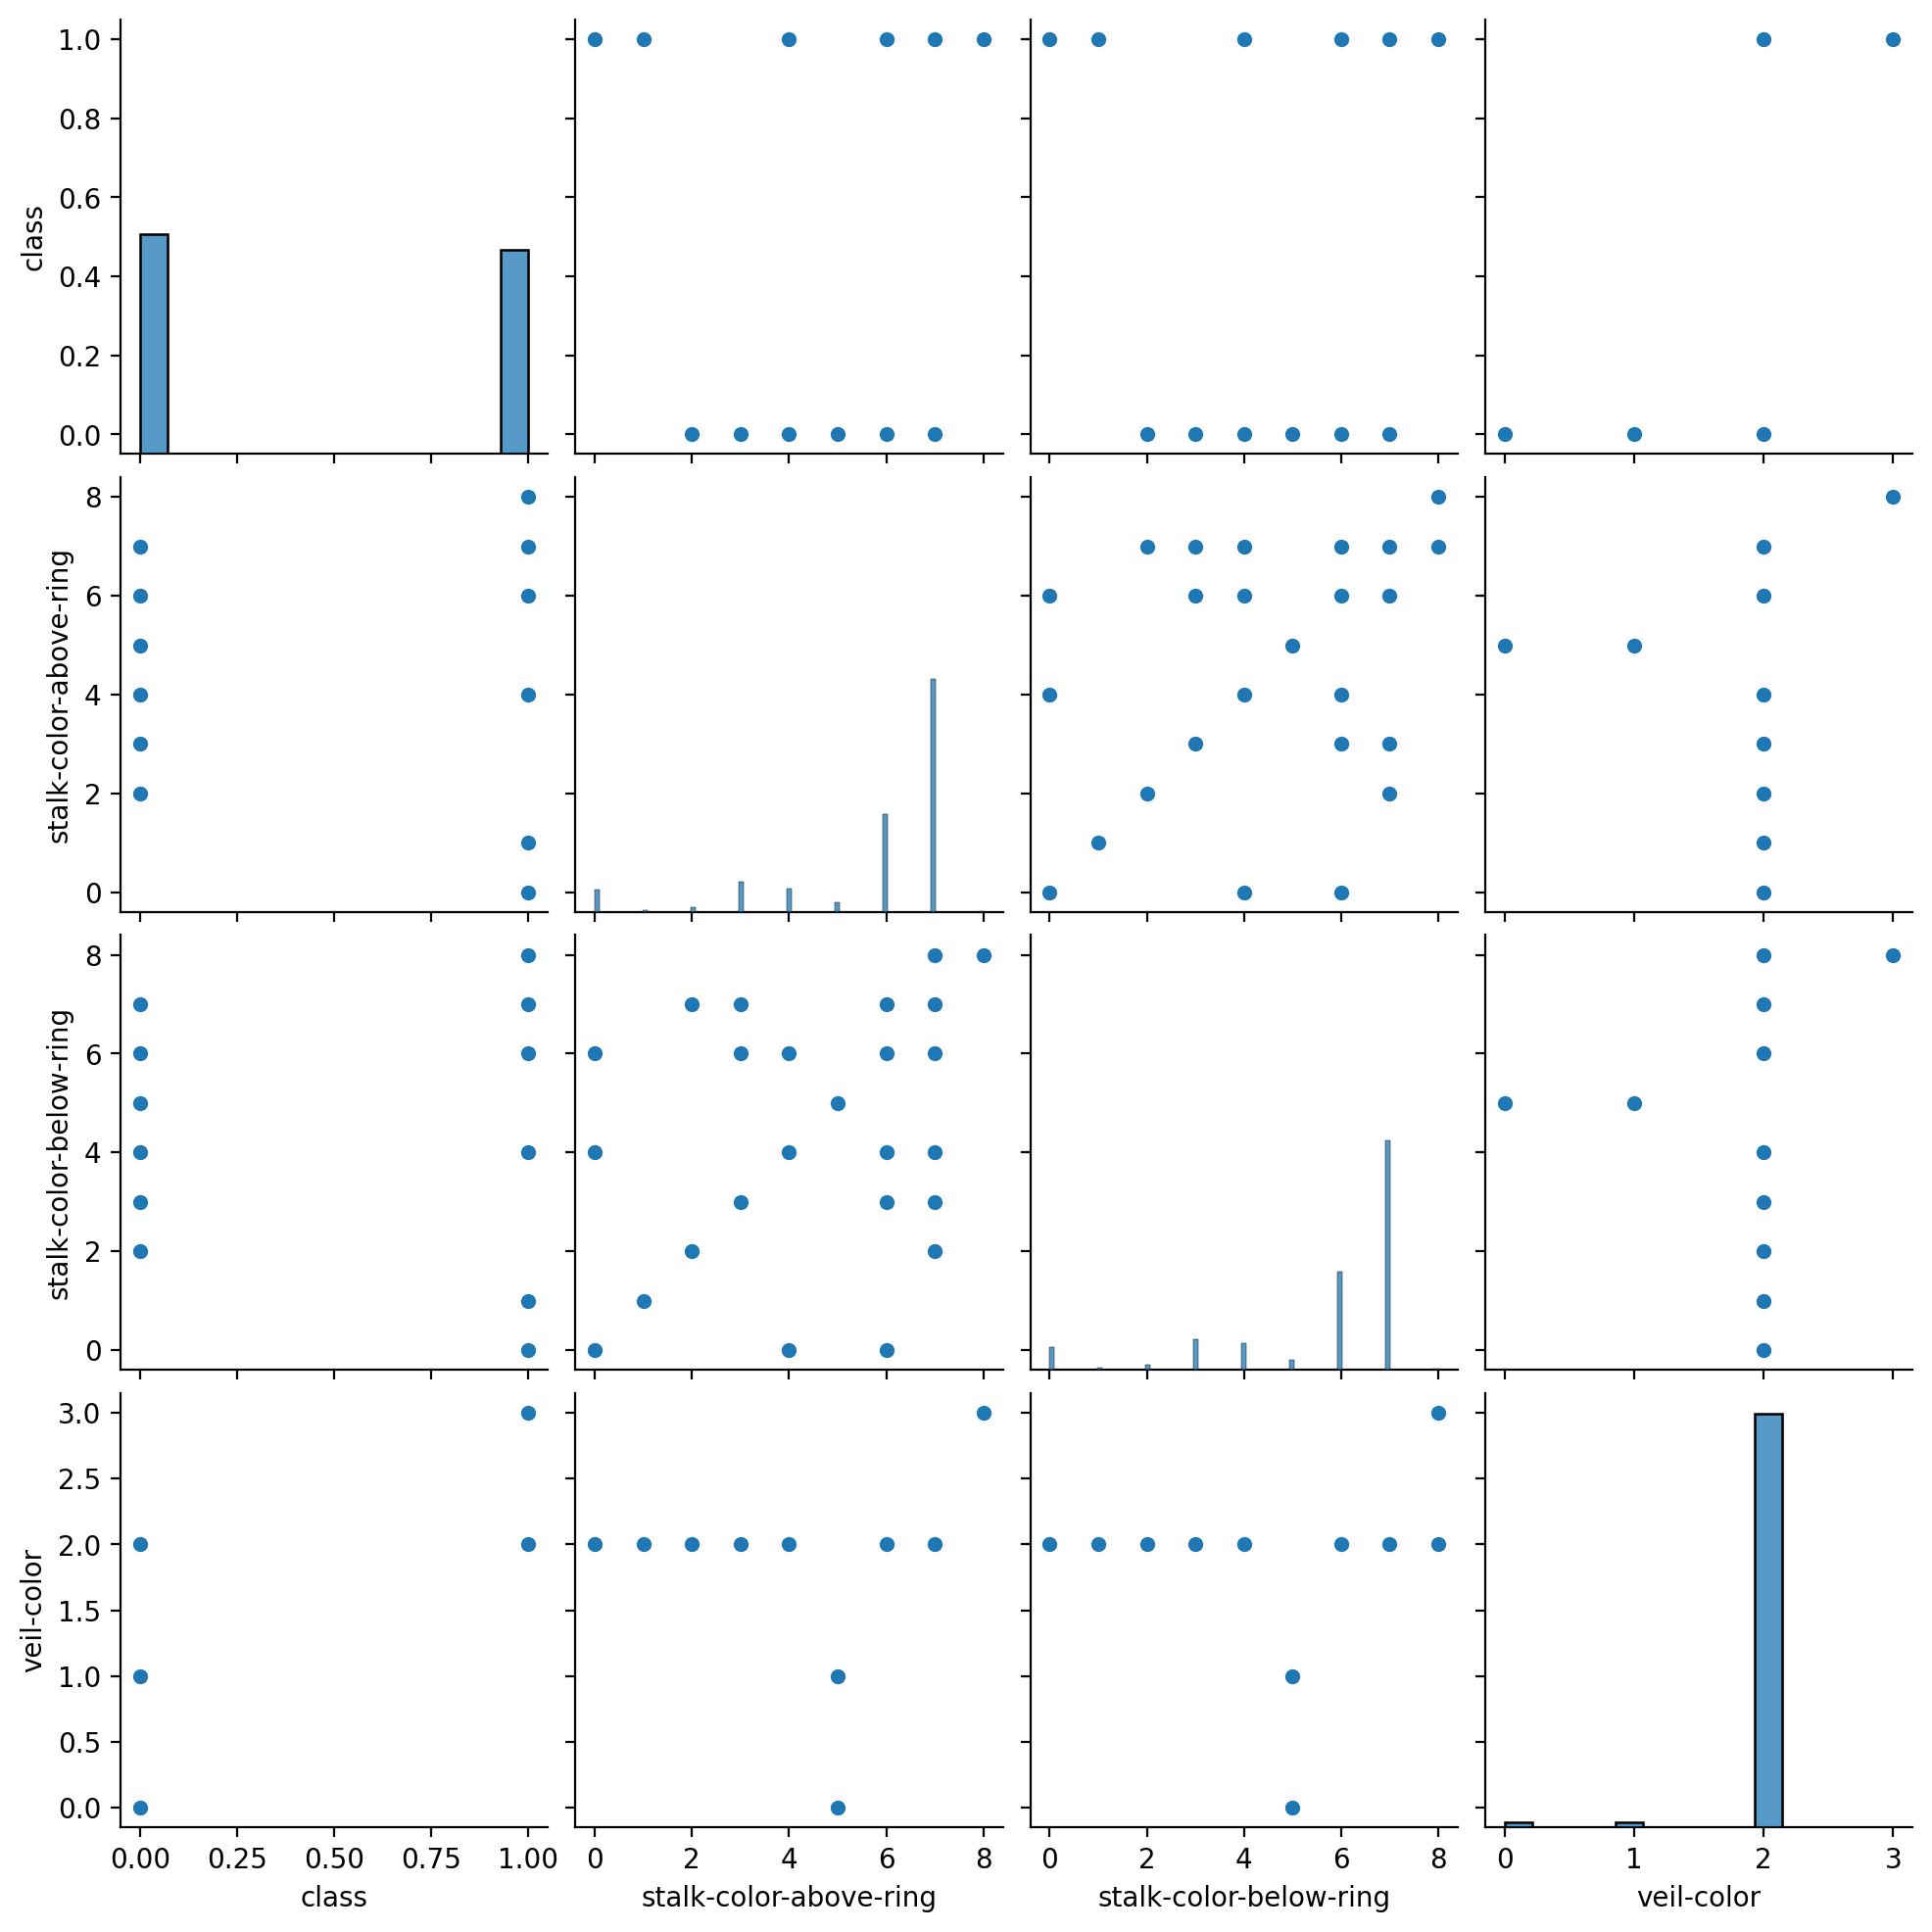

In [100]:
df_1 = df.iloc[:, [0, 14, 15, 16]]
sns.pairplot(df_1)

Также мы можем раскрасить точки в соответствии с меткой класса, используя параметр hue:

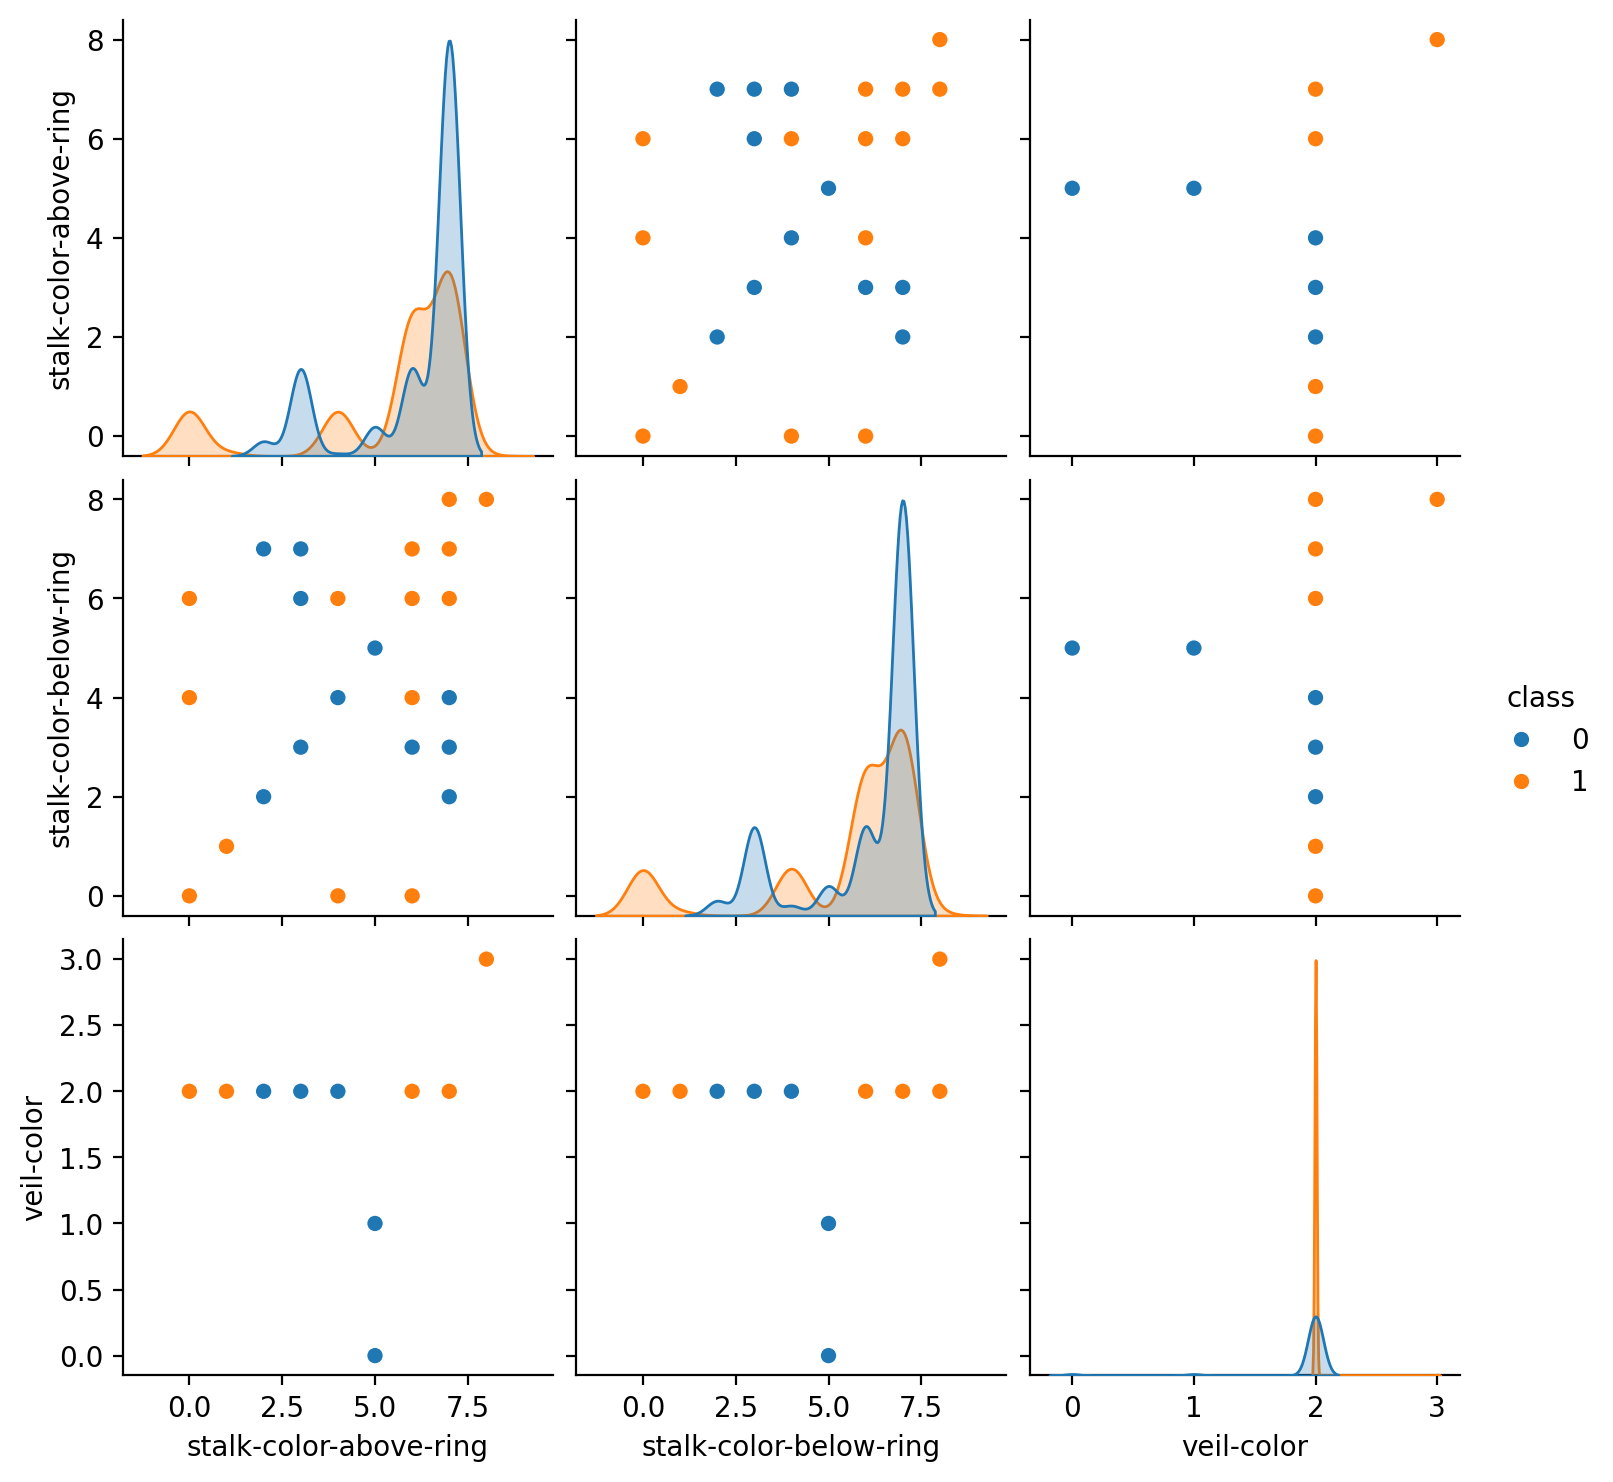

In [101]:
sns.pairplot(df_1, hue = 'class')

Построим на одном рисунке 3 диаграммы, расположенные на последнем графике под главной диагональю, чтобы в дальнейшем раскрасить точки в соответствии с прогнозом модели-классификатора.

Для построения точечной диаграмма используется функция scatter(), а параметрами alpha, s и linewidth можно регулировать прозрачность маркеров, размер маркеров и ширину их границы соответственно. Более прозрачные маркеры говорят о том, что объектов с такими параметрами мало, менее прозрачные – наоборот, так как происходит наложение маркеров друг на друга.

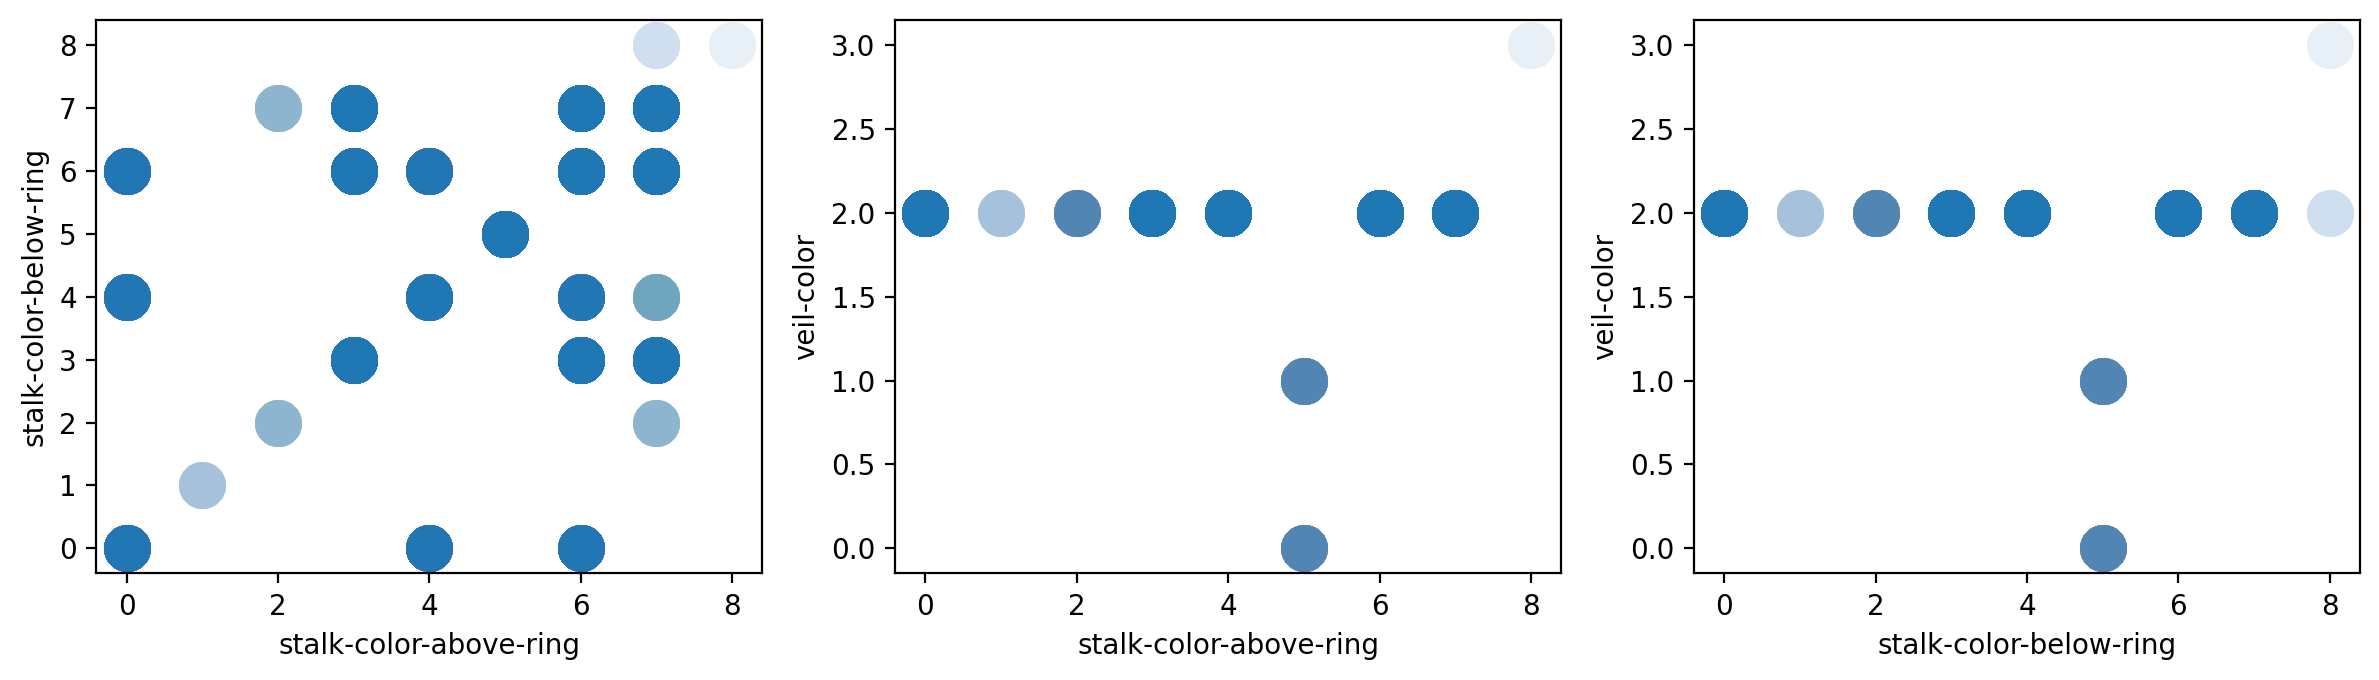

In [102]:
df_2 = df.iloc[:, [14, 15, 16]]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3.5))

indexes_cols_pairs = [(0, 1), (0, 2), (1, 2)]

for i in range(3):

    idx_col1 = indexes_cols_pairs[i][0]

    idx_col2 = indexes_cols_pairs[i][1]

    axs[i].scatter(x=df_2.iloc[:, idx_col1],

                   y=df_2.iloc[:, idx_col2],

                   alpha=0.01, s=290, linewidth=0)

    axs[i].set_xlabel(df_2.iloc[:, idx_col1].name)

    axs[i].set_ylabel(df_2.iloc[:, idx_col2].name)

    plt.tight_layout()

Раскрасим маркеры в соответствии с фактическими метками классов при помощи параметра c:

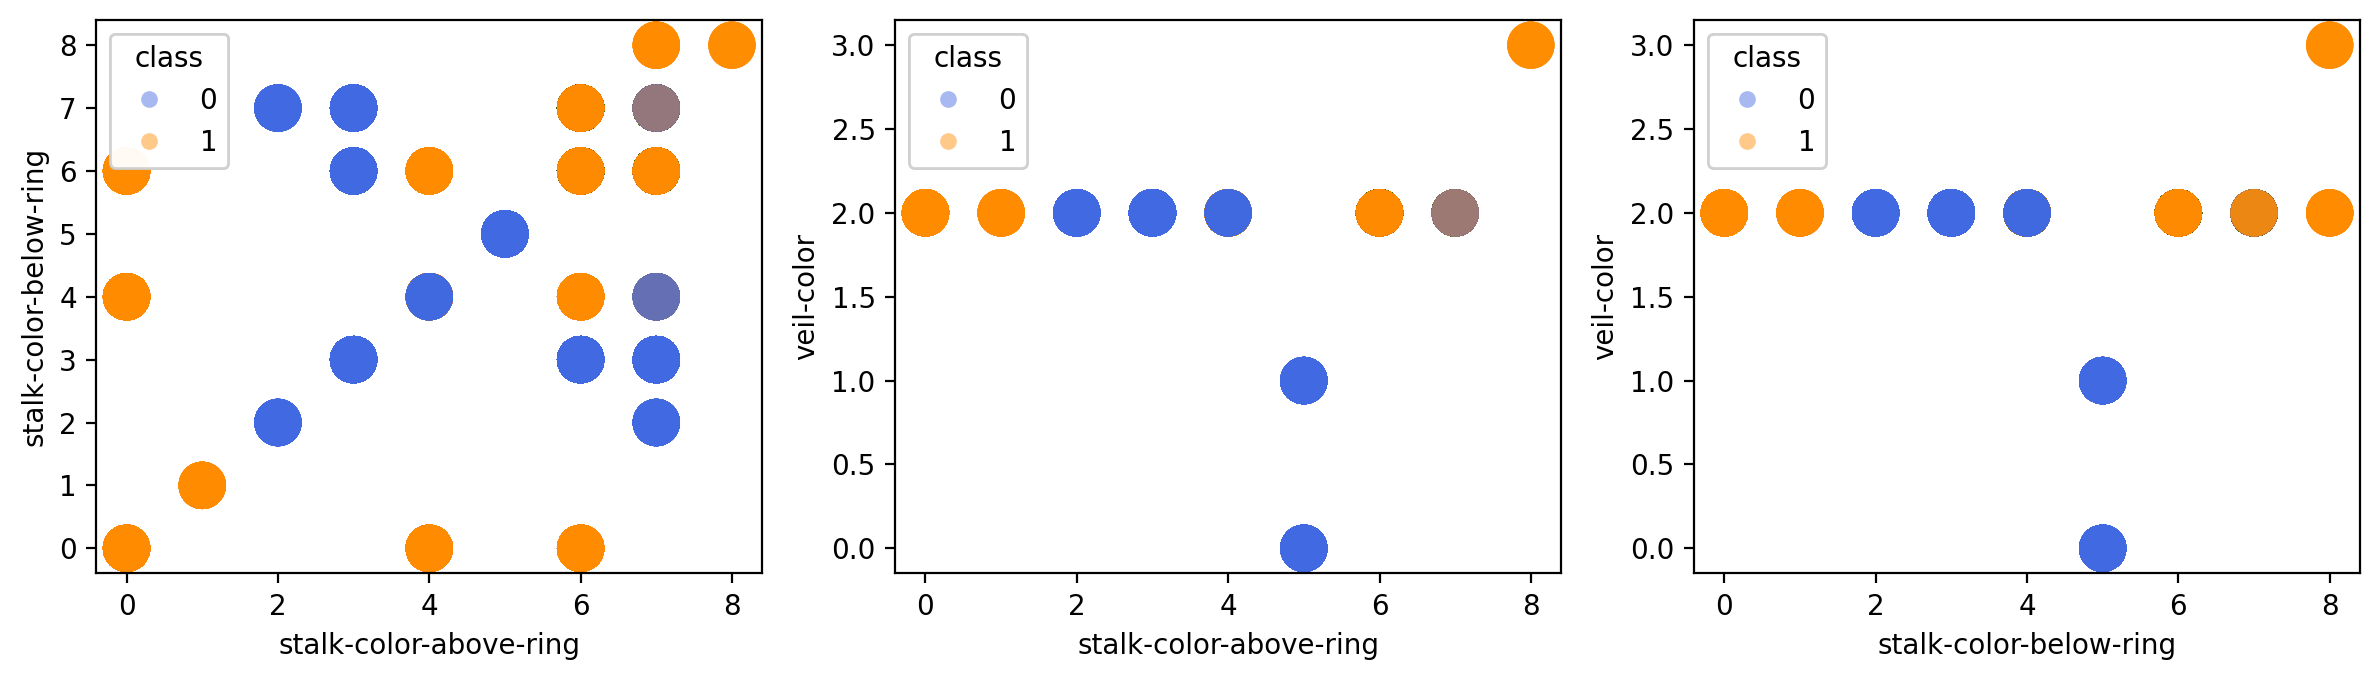

In [108]:
df_2 = df.iloc[:, [14, 15, 16]]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3.5))

indexes_cols_pairs = [(0, 1), (0, 2), (1, 2)]



# Создание цветовой карты

cvals  = [0, 1]

colors = ['royalblue', 'darkorange']

norm=plt.Normalize(min(cvals), max(cvals))

tuples = list(zip(map(norm, cvals), colors))

cmap = mpl.colors.LinearSegmentedColormap.from_list('', tuples)



# Построение 3 графиков на 1 рисунке

for i in range(3):

    idx_col1 = indexes_cols_pairs[i][0]

    idx_col2 = indexes_cols_pairs[i][1]

    s = axs[i].scatter(x=df_2.iloc[:, idx_col1],

                   y=df_2.iloc[:, idx_col2],

                   alpha=0.41, s=290, linewidth=0,

                   c=df_1.iloc[:, 0], cmap = cmap)

    axs[i].set_xlabel(df_2.iloc[:, idx_col1].name)

    axs[i].set_ylabel(df_2.iloc[:, idx_col2].name)

    plt.tight_layout()

    # Легенда

    legend1 = axs[i].legend(*s.legend_elements(),

                            loc='upper left', title='class')

    axs[i].add_artist(legend1)

На построенных диаграммах синие маркеры соответствуют классу 0 (неядовитые грибы), оранжевые маркеры – классу 1 (ядовитые грибы), маркеры со смешенным цветом свидетельствуют о наложении маркеров с разными цветами (и класса 0 и класса 1), то есть в этих случаях имеет место быть неопределенность и большее влияние других факторов.

Последний код с несущественными модификациями будет использован в дальнейшем для построения точечных диаграмм и раскраски маркеров, но уже в соответствии с моделью-классификатором. Поэтому создадим функцию, работающую с таблицей DataFrame, состоящей из 4 столбцов: 1 столбец содержит метки классов, последние 3 столбца – значения факторных переменных:

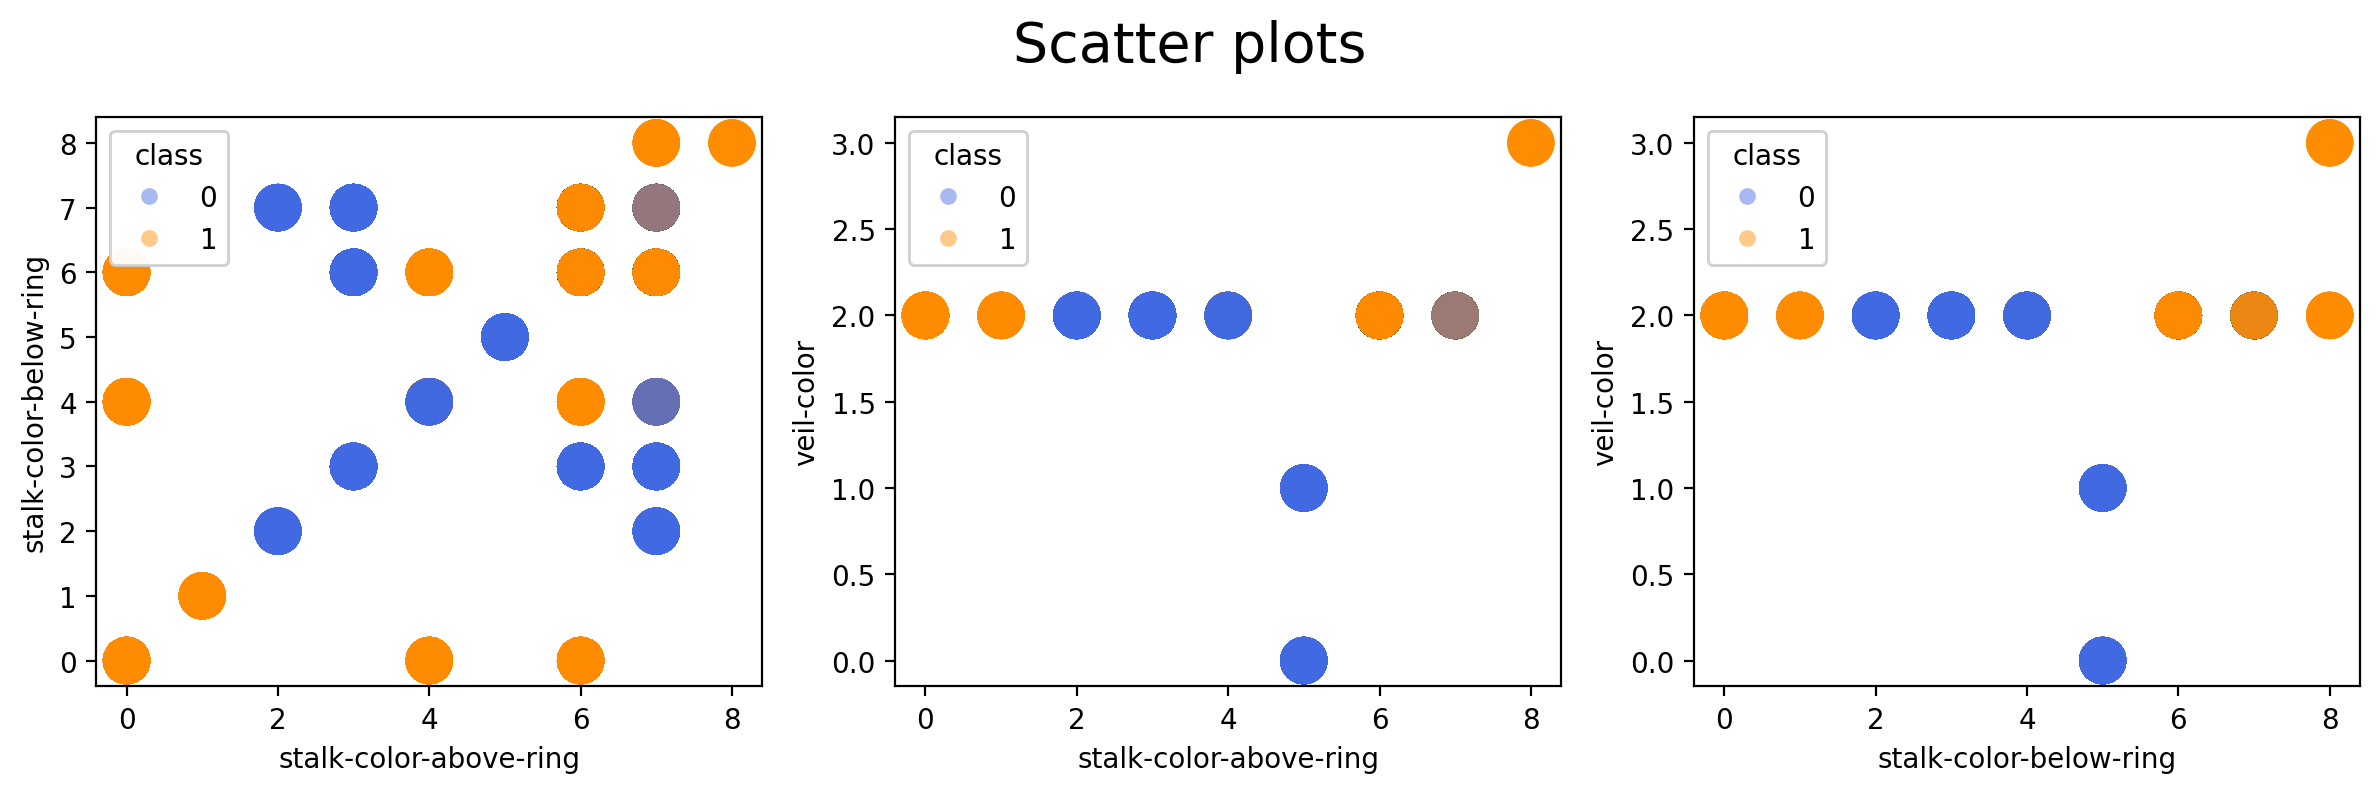

In [109]:
# Функция построения 3 точечных диаграмм на 1 рисунке

def scatter_1x3plots(df_plot, title = None):

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

    indexes_cols_pairs = [(1, 2), (1, 3), (2, 3)]



    # Создание цветовой карты

    cvals  = [0, 1]

    colors = ['royalblue', 'darkorange']

    norm=plt.Normalize(min(cvals), max(cvals))

    tuples = list(zip(map(norm, cvals), colors))

    cmap = mpl.colors.LinearSegmentedColormap.from_list('', tuples)



    # Построение 3 графиков на 1 рисунке

    for i in range(3):

        idx_col1 = indexes_cols_pairs[i][0]

        idx_col2 = indexes_cols_pairs[i][1]

        s = axs[i].scatter(x=df_plot.iloc[:, idx_col1],

                       y=df_plot.iloc[:, idx_col2],

                       alpha=0.41, s=290, linewidth=0,

                       c=df_plot.iloc[:, 0], cmap = cmap)

        axs[i].set_xlabel(df_plot.iloc[:, idx_col1].name)

        axs[i].set_ylabel(df_plot.iloc[:, idx_col2].name)

        plt.tight_layout()

        # Легенда

        legend1 = axs[i].legend(*s.legend_elements(),

                                loc='upper left', title='class')

        axs[i].add_artist(legend1)



    # Заголовок

    fig.suptitle(title, fontsize=20)

    plt.tight_layout()



scatter_1x3plots(df_plot = df_1, title='Scatter plots')

Теперь после построения и обучения модели-классификатора, предсказанные метки классов необходимо будет представить в виде первого столбца таблицы df_1 и вызвать данную функцию, чтобы проверить результаты классификации

# Описательная статистика

**Описательная статистика** (Descriptive statistics) – обобщение свойств исследуемой переменной путем расчета статистических показателей:

**Среднее** (Mean) – середина распределения значений переменной.

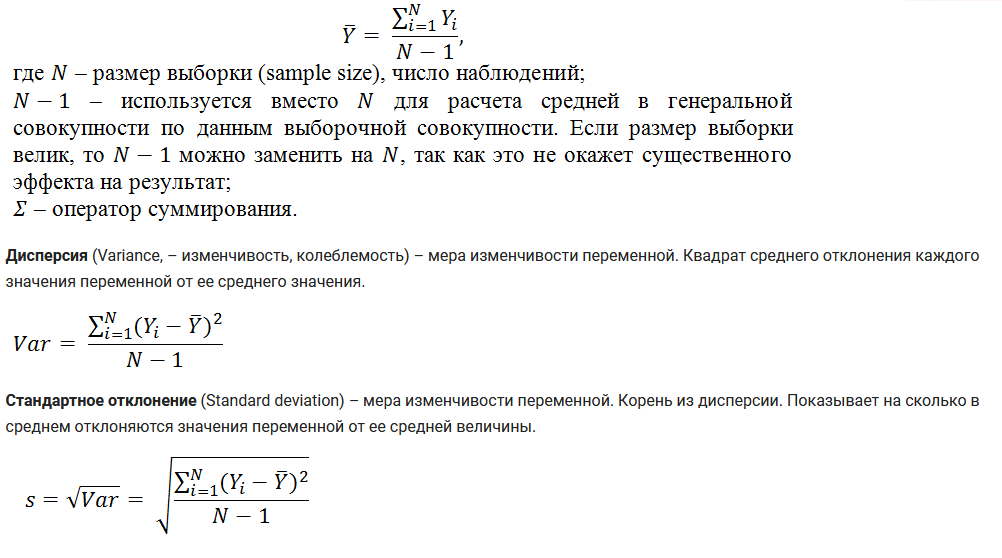

Описательную статистику для каждой переменной в наборе данных df (объект DataFrame) можно рассчитать с помощью метода describe():

In [110]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,...,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,0.482024,3.347698,1.827629,4.504186,0.415415,4.145038,0.974144,0.161537,0.309160,4.810884,...,1.574982,1.603546,5.816055,5.794386,1.965526,1.069441,2.291554,3.597020,3.644299,1.508249
std,0.499708,1.604317,1.230021,2.545640,0.492824,2.103385,0.158714,0.368048,0.462176,3.540772,...,0.621500,0.676029,1.901891,1.907432,0.242698,0.271096,1.801694,2.382882,1.252083,1.719742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


По описательной статистике мы, в том числе, можем видеть, что размеры двух классов примерно одинаковые, т.к. mean по столбцу class равно 0,48, т.е. объектов с меткой класса 0 немного больше, чем объектов с меткой класса 1.

Определить точные размеры классов можно, например, следующим образом:

In [111]:
len(df['class'][df['class'] == 1])

3915

In [112]:
len(df['class'][df['class'] == 0])

4207

In [ ]:
#from sklearn import preprocessing

In [ ]:
#df_transform['Normalized'] = sklearn.preprocessing.normalize(var1_array, axis = 0, norm = 'max')

df_transform = pd.DataFrame()
for col in df.columns:
  data_raw = df[col]
  le.fit(data_raw)
  data_transform = le.transform(data_raw)
  df_transform[col] = data_transform

In [116]:
# Функция для нормализации
def normalize(A):
    return (A - A.min()) / (A.max() - A.min())

# Применение нормализации ко всем значениям в DataFrame
df_normalize = pd.DataFrame()
for col in df.columns:
  normalized_col = normalize(df[col])
  df_normalize[col] = normalized_col


In [117]:
df_normalize.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,...,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,0.482024,0.669540,0.609210,0.500465,0.415415,0.518130,0.974144,0.161537,0.309160,0.437353,...,0.524994,0.534515,0.727007,0.724298,0.655175,0.534721,0.572888,0.449628,0.728860,0.251375
std,0.499708,0.320863,0.410007,0.282849,0.492824,0.262923,0.158714,0.368048,0.462176,0.321888,...,0.207167,0.225343,0.237736,0.238429,0.080899,0.135548,0.450424,0.297860,0.250417,0.286624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,0.000000,0.333333,0.000000,0.250000,1.000000,0.000000,0.000000,0.181818,...,0.333333,0.333333,0.750000,0.750000,0.666667,0.500000,0.000000,0.250000,0.600000,0.000000
50%,0.000000,0.600000,0.666667,0.444444,0.000000,0.625000,1.000000,0.000000,0.000000,0.454545,...,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,0.500000,0.375000,0.800000,0.166667
75%,1.000000,1.000000,1.000000,0.888889,1.000000,0.625000,1.000000,0.000000,1.000000,0.636364,...,0.666667,0.666667,0.875000,0.875000,0.666667,0.500000,1.000000,0.875000,0.800000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
for col in df.columns:
  print(col,  df.loc[:, col].unique(), df_normalize[col].unique())

class [0 1] [0. 1.]
cap-shape [0 5 4 2 3 1] [0.  1.  0.8 0.4 0.6 0.2]
cap-surface [2 3 0 1] [0.66666667 1.         0.         0.33333333]
cap-color [8 3 9 4 2 5 0 7 1 6] [0.88888889 0.33333333 1.         0.44444444 0.22222222 0.55555556
 0.         0.77777778 0.11111111 0.66666667]
bruises? [1 0] [1. 0.]
odor [3 6 5 0 2 1 8 7 4] [0.375 0.75  0.625 0.    0.25  0.125 1.    0.875 0.5  ]
gill-attachment [1 0] [1. 0.]
gill-spacing [0 1] [0. 1.]
gill-size [0 1] [0. 1.]
gill-color [ 5  4  2  7 10  3  9  1  0  8 11  6] [0.45454545 0.36363636 0.18181818 0.63636364 0.90909091 0.27272727
 0.81818182 0.09090909 0.         0.72727273 1.         0.54545455]
stalk-shape [0 1] [0. 1.]
stalk-root [1 2 0 3 4] [0.25 0.5  0.   0.75 1.  ]
stalk-surface-above-ring [2 0 1 3] [0.66666667 0.         0.33333333 1.        ]
stalk-surface-below-ring [2 0 3 1] [0.66666667 0.         1.         0.33333333]
stalk-color-above-ring [7 3 6 4 0 2 5 1 8] [0.875 0.375 0.75  0.5   0.    0.25  0.625 0.125 1.   ]
stalk-color

In [121]:
df_normalize.to_csv('agaricus-lepiota_normalize.csv')